<a href="https://colab.research.google.com/github/Parishri07/Medical-Imaging-using-PyTorch/blob/main/Dicom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.1 MB/s eta 0:00:00


In [2]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dicom_file = pydicom.read_file('/content/drive/MyDrive/Colab Notebooks/CT Medical images/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [5]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [6]:
dicom_file[0x0028, 0x0010]
# hexadecimal values

(0028, 0010) Rows                                US: 512

In [7]:
dicom_file.Rows

512

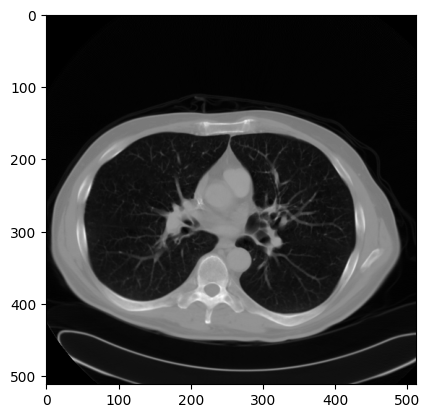

In [8]:
ct = dicom_file.pixel_array

plt.figure()
plt.imshow(ct, cmap=plt.cm.gray)

In [51]:
path_to_head_mri = Path('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001')

In [57]:
all_files = list(path_to_head_mri.glob("*.dcm"))

In [58]:
all_files

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000008.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000009.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000007.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000006.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000005.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000004.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000003.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000001.dcm'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000002.dcm')]

In [59]:
data = pydicom.read_file('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/DICOMDIR')

In [60]:
mri_data = []

for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [62]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

212.354544366908
192.668114862408
234.238984502738
212.222896370129
191.725956735247


In [63]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data_ordered[:5]:
  print(slice.SliceLocation)

0
24.9999997358192
50.0000006623824
174.008985874786
191.725956735247


In [64]:
full_volume = []
for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

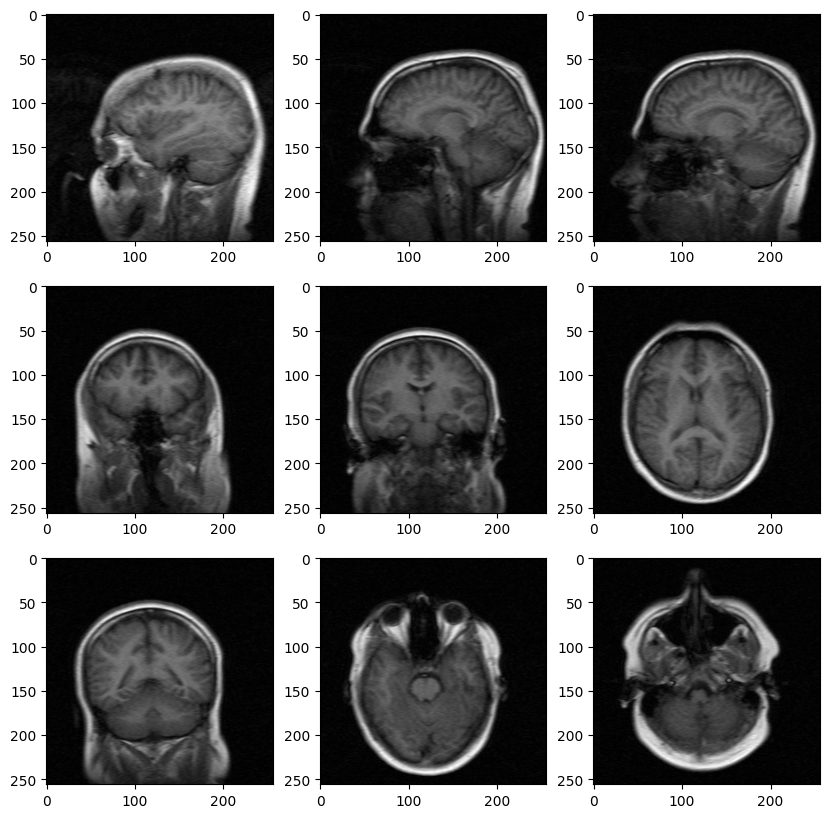

In [66]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i, j].imshow(full_volume[slice_counter], cmap=plt.cm.gray)
    slice_counter += 1

In [68]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.6 MB/s eta 0:00:00


In [69]:
import SimpleITK as sitk

series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.2.276.0.7230010.3.1.3.4087122745.11320.1706773134.3937',)


In [70]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000007.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000008.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000009.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000003.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000002.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000001.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000004.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000005.dcm',
 '/content/drive/MyDrive/Colab Notebooks/Brain MRI scan/ST000001/SE000001/IM000006.dcm')

In [71]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [72]:
image_data = series_reader.Execute()

In [73]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(9, 256, 256)

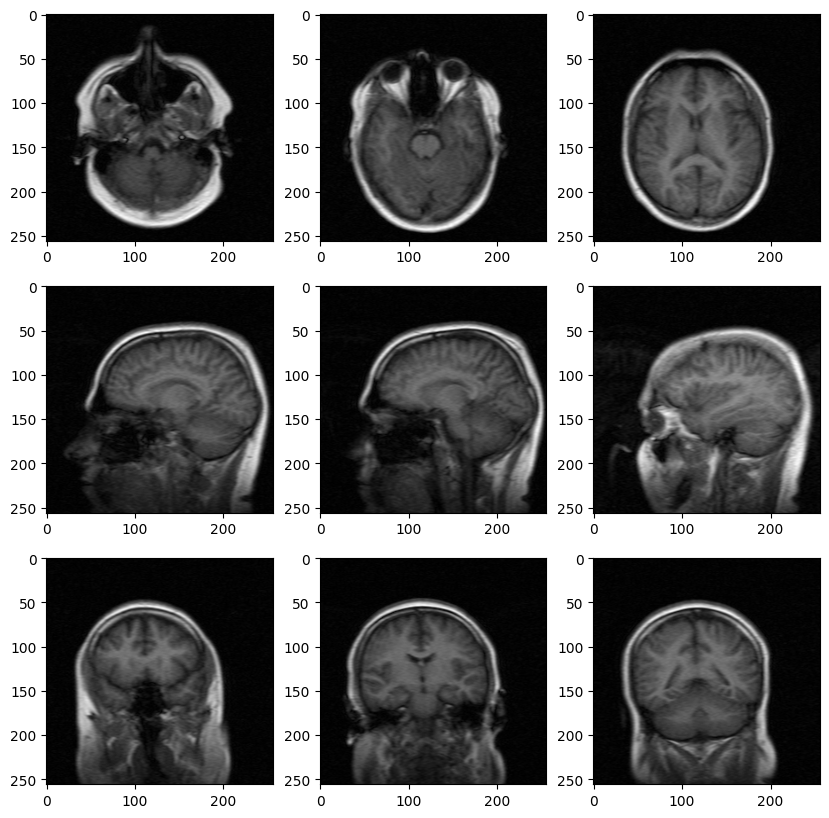

In [74]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i, j].imshow(head_mri[slice_counter], cmap=plt.cm.gray)
    slice_counter += 1